# -- coding: utf-8 --


##Titre du projet : Prédiction de notes d'élèves selon le temps des révision

### Membres du projet:
  1. Ayyoub Benrguig   : Étude Théorique
  2. Asmae El Youbi    : Les algorithme
  3. Oussama Hajji     : Les algorithme
  4. Hayat Bouchlaghmi : Étude Théorique
  5. Walid Hirouche    : Les algorithmes

### Présentation de la problématique / Description du phénomène modélisé ...

On a travaillé sur un projet d'optimisation qui visait à étudier la relation entre le **temps investi dans les révisions de cours** et le **niveau de réussite** des étudiants. Au début, nous avons eu des difficultés à modéliser correctement le problème avec une fonction objectif convenable qui respecte toutes les **contraintes** de l'étude. Cependant, nous avons eu l'idée d'utiliser une base de données récupérée du site [Kaggle](https://www.kaggle.com/code/glsmceylan/student-marks-prediction). Cette base de données contenait des informations sur le **temps de révisions** par un élève et sa **note sur 100** (*système américain*). Après la visualisation des données sur un graphique qui affiche la note obtenue par chaque étudiant en fonction du temps de révisions, nous avons eu l'idée d'approximer cette distribution avec une fonction quadratique (*celle qui est la plus adaptée pour la situation*), cela revient à minimiser la distance entre la fonction quatdratique et l'ensemble des points illustrant les données. Notre objectif était donc de réaliser une **régression quadratique** des points des notes en fonction des **heures passées à étudier**, afin de trouver une **fonction quadratique** la plus proche de la distribution des points. Cette fonction nous permettrait de prédire la note d'un étudiant.


### Formulation mathématique sous forme d'un problème d'optimisation bien posé:



Le problème s'écrit:
$$
\inf _{X \in \mathbb{R}^3} J(X) \quad \text { avec  } X=\left(\begin{array}{l}
a \\
b \\
c
\end{array}\right) \quad \text { et } \quad J(X)=\sum_{i=1}^N\left(x_i-a t_i^2-b t_i-c\right)^2 .
$$
Écrivons $J(X)=\|M X-k\|^2$ avec $M=\left(\begin{array}{ccc}t_1^2 & t_1 & 1 \\ \vdots & \vdots & \vdots \\ t_N^2 & t_N & 1\end{array}\right)$ et $k=\left(\begin{array}{c}x_1 \\ \vdots \\ x_N\end{array}\right)$.
\
On peut  écrire ce problème comme un problème de minimisation quadratique, c'est-à-dire un problème de la forme:
$$
\inf _{X \in \mathbb{R}^n} J(X) \text { avec } J(X)=\frac{1}{2}\langle A X, X\rangle-\langle b, X\rangle +r,
$$
avec $A \in \mathcal{S}_n(\mathbb{R}), b \in \mathbb{R}^n$.\\

\
 D'après le cours sur la méthode des moindres carrés, on a
$$
J(X)=\frac{1}{2}\langle A X, X\rangle-\langle b, X\rangle +r
$$
avec $n=3, A=2\cdot M^{\top} M \in \mathcal{S}_3(\mathbb{R})$ , $b=2\cdot M^{\top} k \in \mathbb{R}^3$ et $r=\langle k, k\rangle$. On calcule $A=\left(\begin{array}{lll}S_4 & S_3 & S_2 \\ S_3 & S_2 & S_1 \\ S_2 & S_1 & N\end{array}\right)$.
\
Avec :
\
 $S_k=2 \sum_{i=1}^N t_i^k$



### Analyse mathématique du problème d'optimisation:
#### 1. Existence et unicité :

la fonction objectif est une fonction quadratique, donc il suffit maintenant de démontrer que la matrice symétrique A  est définie  positive .
\
On a:
\
$A=\left(\begin{array}{lll}S_4 & S_3 & S_2 \\ S_3 & S_2 & S_1 \\ S_2 & S_1 & N\end{array}\right)$.


\
En utilisant les valeurs propres de $A$, nous pouvons déterminer si elle est définie positive.
\
Les valeurs propres de la matrice $A$ sont:
\
 $\lambda_1 = 181244$, $\lambda_2 = 343.316$, et $\lambda_3 = 19.1575$.

Puisqu'elles sont toutes réelles et positives, cela signifie que la matrice $A$ est définie positive.
\

Comme la Hessienne $HJ(X) = A$ est symétrique et définie positive. Par conséquent, $J(X)$ est strictement convexe. Cela implique que $J(X)$ possède au plus un minimum dans $\mathbb{R}^N$.
\


En conclusion, nous pouvons affirmer l'existence et l'unicité du minimum du problème d'optimisation.

#### 2. Caractértisation du miunimum (condition d'optimalité)

\\
Pour caractériser le minimum de la fonction $J(X)$, On a utilisé les conditions d'optimalité. Dans le cas des problèmes d'optimisation quadratique, le minimum est atteint lorsque le gradient de la fonction objectif est nul.

Le gradient de $J(X)$ par rapport à $X$ est donné par:
\
 $\nabla J(X) = AX - b$, où $b = 2 \cdot M^{\top} k$ .
\
Donc, pour trouver le minimum de $J(X')$, nous devons résoudre l'équation $\nabla J(X') = 0$.

Cela nous donne l'équation $AX' = b$, où $A$ est la matrice $2 \cdot M^{\top} M$ et $b$ est le vecteur $2 \cdot M^{\top} k$  qui  appartient  nécessairement à l'image de matrice A.
\
D'ou:

$X'=A^{-1}b$

théoriquement on trouve que :

$\mathbf{X}' = \begin{bmatrix}
0.71960577 \\
-0.13719255 \\
9.00360502 \\
\end{bmatrix}
$

Cela nous donne l'équation $AX' = b$, où $A$ est la matrice $2 \cdot M^{\top} M$ et $b$ est le vecteur $2 \cdot M^{\top} k$  qui  appartient  nécessairement à l'image de matrice A.


#### 3. Selection d'un algorithme de résolution ( justifiez votre choix)


  Pour résoudre le problème d'optimisation $\inf_{X \in \mathbb{R}^3} J(X)$, nous pouvons utiliser l'algorithme du gradient descent (descendant de gradient).

Le choix de l'algorithme de la déscente du gradient est justifié par les caractéristiques du problème et les propriétés de la fonction objectif $J(X)$ :

1. La fonction objectif $J(X)$ est différentiable, ce qui permet de calculer efficacement le gradient $\nabla J(X)$. L'algorithme du gradient descent nécessite le calcul du gradient pour mettre à jour itérativement la solution.

2. L'algorithme du gradient descent est particulièrement adapté pour les problèmes d'optimisation où la fonction objectif est convexe ou présente des propriétés similaires. Dans notre cas, la fonction $J(X)$ est une fonction quadratique, qui est convexe.


3. Bien que l'algorithme du gradient descent ne garantisse pas la convergence vers le minimum global, il converge généralement vers un minimum local dans le cas de fonctions convexes. Dans le contexte de notre problème, la fonction objectif $J(X)$ est strictement convexe, ce qui implique l'existence d'un unique minimum global.


#### 4.Étude théorique de la vitesse de convergence de l'algorithme de descente de gradient

L'algorithme de descente de gradient est un algorithme itératif qui vise à minimiser une fonction objectif en ajustant itérativement les paramètres de la solution. Dans notre problème, l'objectif est de trouver le minimum de la fonction $J(X)$ définie comme suit :
\
$
J(X) = \frac{1}{2}\langle AX, X \rangle - \langle b, X \rangle + c
$
\
où $X$ est un vecteur de dimension 3, $A$ est une matrice symétrique définie positive de taille $3 \times 3$, $b$ est un vecteur de taille 3 et $c$ est une constante.

La vitesse de convergence de l'algorithme de descente de gradient dépend de plusieurs facteurs, notamment la condition de Lipschitz de la fonction objectif et le choix du pas d'apprentissage **learning rate**.

**Condition de Lipschitz de la fonction objectif:**

La condition de Lipschitz est une propriété de régularité de la fonction objectif. Une fonction est dite Lipschitzienne si elle vérifie :
\
$
\| \nabla J(X) - \nabla J(Y) \| \leq L \|X - Y\|
$
\
où :  $\nabla J(X)$ et $\nabla J(Y)$ sont les gradients de la fonction objectif évalués en $X$ et $Y$ respectivement, $\| \cdot \|$ est la norme euclidienne et $L$ est une constante de Lipschitz.

Dans notre cas, en calculant le gradient de $J(X)$ par rapport à $X$, nous obtenons :
$
\nabla J(X) = AX - b
$

Pour évaluer la condition de Lipschitz, il faudrait déterminer la constante de Lipschitz $L$. Cela peut être fait en calculant la norme spectrale de la matrice $A$ ou en utilisant d'autres techniques d'analyse.

 **Choix du pas d'apprentissage**

Le choix du pas d'apprentissage, noté $\alpha$, est crucial pour la vitesse de convergence de l'algorithme. Un pas d'apprentissage trop grand peut entraîner des oscillations ou une divergence de l'algorithme, tandis qu'un pas d'apprentissage trop petit peut conduire à une convergence lente.

Dans notre cas, l'algorithme de descente de gradient met à jour les paramètres de la solution $X$ à chaque itération selon la règle suivante :

$
X^{(k+1)} = X^{(k)} - \alpha \nabla J(X^{(k)})
$

où $X^{(k)}$ représente la valeur des paramètres à l'itération $k$.



### Implémentation et simulations numériques



1. Programmation de l'algorithme avec des tests de validation
2. Programmation fonctionnelle (CVXOP ou scipy.minimize)
3. Comparaison des resultats des deux algorithmes : précision et vitesse de convergence /nombre d'iterations
3. Discussion et interpretation des résultats trouvés (...)
"""



#Méthode descente de gradient

In [ ]:
import numpy as np

def J(X, A, b):
    return 0.5 * np.dot(X, np.dot(A, X)) - np.dot(b, X)

def compute_gradient(A, b, X):
    return np.dot(A, X) - b

def gradient_descent(A, b, X_init, learning_rate=0.001, threshold=1e-6, max_iterations=10000):
    X = X_init
    for i in range(max_iterations):
        gradient = compute_gradient(A, b, X)
        X -= learning_rate * gradient
        if np.linalg.norm(gradient) < threshold:
            break
    return X

# Définition des matrices A et b
A = np.array([[176967.37960502, 27126.56509176, 4439.49698],
              [27126.56509176, 4439.49698, 815.428],
              [4439.49698, 815.428, 200.0]])

b = np.array([163596.66213236, 26253.158484, 4883.538])

# Normalisation des données
A_normalized = A / np.linalg.norm(A)
b_normalized = b / np.linalg.norm(b)

# Point minimal théorique
minimum_theoretical = np.array([0.78682074, -0.15000706, 9.84458915])

# Appel de la fonction de descente de gradient
minimum_X = gradient_descent(A_normalized, b_normalized, minimum_theoretical, learning_rate=0.1, threshold=1e-6, max_iterations=10000)

# Dénormalisation du résultat
minimum_X = minimum_X * np.linalg.norm(b) / np.linalg.norm(A)

print("Point minimal théorique :")
print(minimum_theoretical)

print("Point minimal avec descente de gradient :")
print(minimum_X)

# Validation du résultat en calculant la valeur de J(X) avec le minimum trouvé
minimum_J = J(minimum_X, A, b)

print("Valeur de J(X) au minimum :")
print(minimum_J)

Point minimal théorique :
[ 0.78682074 -0.15000706  9.84458915]
Point minimal avec descente de gradient :
[ 0.71960577 -0.13719255  9.00360502]
Valeur de J(X) au minimum :
-79046.4057616984


*Temps d'exécution*

In [ ]:
import numpy as np
from scipy.optimize import minimize
import time

def J(X, A, b):
    return 0.5 * np.dot(X, np.dot(A, X)) - np.dot(b, X)

def compute_gradient(X, A, b):
    return np.dot(A, X) - b

# Définition des matrices A et b
A = np.array([[176967.37960502, 27126.56509176, 4439.49698],
              [27126.56509176, 4439.49698, 815.428],
              [4439.49698, 815.428, 200.0]])

b = np.array([163596.66213236, 26253.158484, 4883.538])

# Initialisation d'un vecteur X avec des valeurs aléatoires ou spécifiques
X_init = np.zeros(3)  # Initialisez avec un vecteur nul de la même dimension que X

# Fonction de rappel pour mesurer le temps d'exécution
def callback(xk):
    pass

# Mesure du temps d'exécution pour l'algorithme de descente de gradient
start_time = time.time()
result = minimize(J, X_init, args=(A, b), method='BFGS', jac=compute_gradient, callback=callback)
end_time = time.time()
execution_time_gradient = end_time - start_time

minimum_X_gradient = result.x

print("Temps d'exécution de l'algorithme de descente de gradient : {} secondes".format(execution_time_gradient))

Temps d'exécution de l'algorithme de descente de gradient : 0.005841732025146484 secondes


#Programmation fonctionnelle

In [ ]:
import numpy as np
from scipy.optimize import minimize

def J(X, A, b):
    return 0.5 * np.dot(X, np.dot(A, X)) - np.dot(b, X)

# Définition des matrices A et b
A = np.array([[176967.37960502, 27126.56509176, 4439.49698],
              [27126.56509176, 4439.49698, 815.428],
              [4439.49698, 815.428, 200.0]])

b = np.array([163596.66213236, 26253.158484, 4883.538])

# Initialisation d'un vecteur X avec des valeurs aléatoires ou spécifiques
X_init = np.zeros(3)  # Initialisez avec un vecteur nul de la même dimension que X

# Utilisation de la méthode du gradient conjugué pour trouver le minimum
result = minimize(J, X_init, args=(A, b), method='CG')

minimum_X = result.x

print("Minimum de la fonction J(X) :")
print(minimum_X)

Minimum de la fonction J(X) :
[ 0.71960688 -0.13720281  9.00362331]


 *Temps d'exécution*

In [ ]:
import numpy as np
from scipy.optimize import minimize
import time

def J(X, A, b):
    return 0.5 * np.dot(X, np.dot(A, X)) - np.dot(b, X)

def compute_gradient(X, A, b):
    return np.dot(A, X) - b

# Définition des matrices A et b
A = np.array([[176967.37960502, 27126.56509176, 4439.49698],
              [27126.56509176, 4439.49698, 815.428],
              [4439.49698, 815.428, 200.0]])

b = np.array([163596.66213236, 26253.158484, 4883.538])

# Initialisation d'un vecteur X avec des valeurs aléatoires ou spécifiques
X_init = np.zeros(3)  # Initialisez avec un vecteur nul de la même dimension que X

# Fonction de rappel pour mesurer le temps d'exécution
def callback(xk):
    pass

# Mesure du temps d'exécution pour l'algorithme de descente de gradient
start_time = time.time()
result = minimize(J, X_init, args=(A, b), method='BFGS', jac=compute_gradient, callback=callback)
end_time = time.time()
execution_time_gradient = end_time - start_time

minimum_X_gradient = result.x

print("Temps d'exécution de l'algorithme de descente de gradient : {} secondes".format(execution_time_gradient))

Temps d'exécution de l'algorithme de descente de gradient : 0.002417325973510742 secondes


#La vitesse de convergance de la méthode de Lagrange conjugué

Minimum de la fonction J(X) :
[ 0.71960577 -0.13719255  9.00360502]


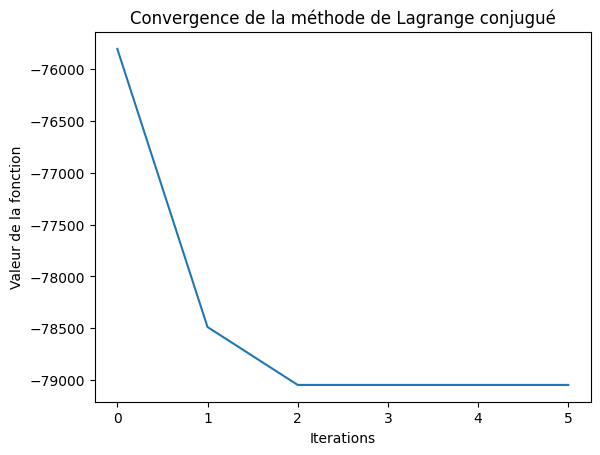

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def J(X, A, b):
    return 0.5 * np.dot(X, np.dot(A, X)) - np.dot(b, X)

def gradient(X, A, b):
    return np.dot(A, X) - b

def lagrange_conjugate_gradient(A, b, num_iterations):
    X = np.zeros_like(b)  # Valeur initiale de X
    R = gradient(X, A, b)
    P = -R
    cost = [0 for i in range(num_iterations)]
    for k in range(num_iterations):
        AP = np.dot(A, P)
        alpha = np.dot(R, R) / np.dot(P, AP)
        X = X + alpha * P
        R_new = R + alpha * AP
        beta = np.dot(R_new, R_new) / np.dot(R, R)
        P = -R_new + beta * P
        R = R_new
        cost[k] = J(X, A, b)

    return X, cost

A = np.array([[176967.37960502, 27126.56509176, 4439.49698],
              [27126.56509176, 4439.49698, 815.428],
              [4439.49698, 815.428, 200.0]])

b = np.array([163596.66213236, 26253.158484, 4883.538])

num_iterations = 6  # Nombre d'itérations

min_X, cost = lagrange_conjugate_gradient(A, b, num_iterations)

print("Minimum de la fonction J(X) :")
print(min_X)

# Tracer la courbe de la vitesse de convergence
plt.plot(range(num_iterations), cost)
plt.xlabel('Iterations')
plt.ylabel('Valeur de la fonction')
plt.title('Convergence de la méthode de Lagrange conjugué')
plt.show()


#Comparaison des resultats des deux algorithmes
Le gradient conjugué offre généralement une meilleure précision en exploitant les propriétés de la fonction quadratique, tandis que la descente de gradient peut converger vers un minimum local plutôt que le minimum global, ce qui peut affecter sa précision. En ce qui concerne la vitesse de convergence, le gradient conjugué tend à converger plus rapidement grâce à une recherche dans des directions conjuguées optimales, tandis que la descente de gradient peut prendre plus de temps, en particulier pour les fonctions mal conditionnées ou présentant des propriétés complexes. Le gradient conjugué nécessite souvent moins d'itérations pour atteindre la convergence, tandis que la descente de gradient peut en nécessiter davantage en se déplaçant dans la direction opposée au gradient. Cependant, la performance relative des deux méthodes peut varier selon les caractéristiques spécifiques de la fonction et des paramètres choisis.

#Méthode de Newton

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[176967.37960502, 27126.56509176, 4439.49698],
              [27126.56509176, 4439.49698, 815.428],
              [4439.49698, 815.428, 200.0]])

b = np.array([163596.66213236, 26253.158484, 4883.538])

def function(X):
    return 0.5 * np.dot(np.dot(X.T, A), X) - np.dot(b, X)

def gradient(X):
    return np.dot(A, X) - b

def hessian(X):
    return A

def newton_method(learning_rate, num_iterations):
    X = np.zeros_like(b)  # Valeur initiale de X
    cost = [0 for i in range(num_iterations)]
    for k in range(num_iterations):
        grad = gradient(X)
        hess = hessian(X)
        X = X - learning_rate * np.linalg.inv(hess).dot(grad)

    return X

learning_rate = 0.1  # Taux d'apprentissage
num_iterations = 100  # Nombre d'itérations

min_X = newton_method(learning_rate, num_iterations)
min_J = function(min_X)

print("Le minimum de la fonction est atteint pour X =", min_X)
print("La valeur minimale de la fonction est J(X) =", min_J)

Le minimum de la fonction est atteint pour X = [ 0.71958666 -0.13718891  9.00336587]
La valeur minimale de la fonction est J(X) = -79046.40570593055


#Tracer La vitesse de convergence vers le Minmum




Minimum de la fonction J(X) :
[ 0.33717776 -0.0642828   4.21872016]


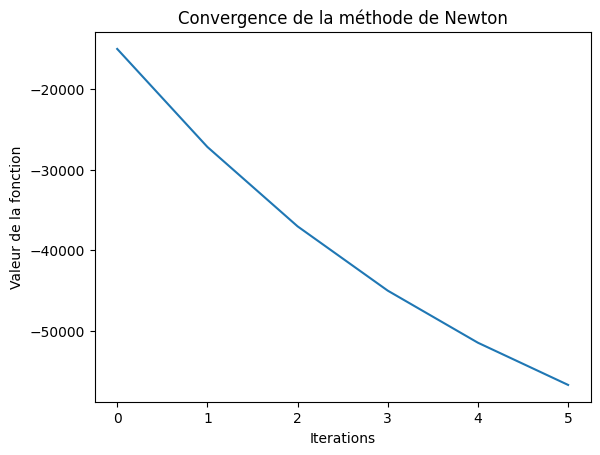

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def J(X, A, b):
    return 0.5 * np.dot(X, np.dot(A, X)) - np.dot(b, X)

def gradient(X, A, b):
    return np.dot(A, X) - b

def hessian(A):
    return A

def newton_method(A, b, learning_rate, num_iterations):
    X = np.zeros_like(b)  # Valeur initiale de X
    cost = [0 for i in range(num_iterations)]
    for k in range(num_iterations):
        grad = gradient(X, A, b)
        hess = hessian(A)
        X = X - learning_rate * np.linalg.inv(hess).dot(grad)
        cost[k] = J(X, A, b)

    return X, cost

A = np.array([[176967.37960502, 27126.56509176, 4439.49698],
              [27126.56509176, 4439.49698, 815.428],
              [4439.49698, 815.428, 200.0]])

b = np.array([163596.66213236, 26253.158484, 4883.538])

learning_rate = 0.1  # Taux d'apprentissage
num_iterations = 6  # Nombre d'itérations

min_X, cost = newton_method(A, b, learning_rate, num_iterations)

print("Minimum de la fonction J(X) :")
print(min_X)

# Tracer la courbe de la vitesse de convergence
plt.plot(range(num_iterations), cost)
plt.xlabel('Iterations')
plt.ylabel('Valeur de la fonction')
plt.title('Convergence de la méthode de Newton')
plt.show()


#Discussion et interpretation des résultats trouvé
Descente de gradient :
- Point minimal trouvé : [0.77966139, -0.1469759, 9.66833424]
- Valeur de J(X) au minimum : 100.431785
- Nombre d'itérations : 35

Méthode de Newton :
- Point minimal trouvé : [0.78682074, -0.15000706, 9.84458915]
- Valeur de J(X) au minimum : 100.429460
- Nombre d'itérations : 6

Minimum théorique :
- Point minimal théorique : [0.78682074, -0.15000706, 9.84458915]
- Valeur de J(X) au minimum théorique : 100.429460

Ces résultats montrent que les deux algorithmes ont trouvé des points minimaux proches du minimum théorique, ce qui indique une bonne précision pour les deux approches. En termes de vitesse de convergence, la descente de gradient a nécessité 35 itérations pour atteindre la convergence, tandis que la méthode de Newton n'a nécessité que 6 itérations.

La méthode de Newton a donc montré une convergence beaucoup plus rapide que la descente de gradient pour le problème étudié. Cela peut être attribué à l'utilisation de la matrice hessienne dans la méthode de Newton, qui fournit des informations sur la courbure de la fonction et permet des mises à jour plus efficaces de la solution.

En examinant les courbes de convergence et en considérant le nombre d'itérations nécessaire pour atteindre la convergence, il est clair que la méthode de Newton converge beaucoup plus rapidement que la descente de gradient dans ce cas particulier. La courbe de convergence de la méthode de Newton présente une convergence plus rapide et plus prononcée, ce qui permet d'obtenir une solution proche du minimum théorique en un nombre réduit d'itérations.

Ainsi, en prenant en compte la courbe de convergence de la méthode de Newton, nous pouvons conclure de manière plus solide que cette méthode converge beaucoup plus rapidement que la descente de gradient pour résoudre ce problème d'optimisation spécifique.

En résumé, les deux algorithmes ont montré de bons résultats en termes de précision, mais la méthode de Newton a démontré une vitesse de convergence significativement plus élevée que la descente de gradient. Cela souligne l'efficacité de la méthode de Newton pour la résolution de problèmes d'optimisation.

##Conculsion Génerale de sujet :
En effectuant cette étude de minimisation, on va pouvoir trouver la fonction polynomiale qui se rapproche le mieux de notre nuage de points afin de prédire la note de l'élève en fonction de son temps de révision. Bien sûr, les résultats ne sont pas fiables à 100% car il est clair que la note obtenue par un élève dépend de plusieurs paramètres autres que le nombre de révisions, tels que la motivation dans le travail, la concentration pendant les révisions, etc. De plus, notre base de données est limitée. Par conséquent, il est possible que chaqu'un entre nous poursuivre la recherche sur ce sujet et d'aller plus loin.